<a href="https://colab.research.google.com/github/FreMeli/Colab/blob/main/Act_19_L%C3%B3pez_Flores_Freya_Melissa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alumno**:Freya Melissa López Flores

**No. de cuenta:** A225952-0

**Profesor:** Lázaro Bustio Martínez

**Fecha de entrega:** 22/03/2023

**Objetivo:** Desarrollar la tarea de agrupamiento de datos para reforzar lo aprendido durante la clase. https://medium.com/codex/customer-segmentation-with-k-means-in-python-18336fb915be

Steps Involved
* Importing the required packages
* Importing the customer data into the python environment
* Analyzing the data and find some useful information
* Processing the data to our needs
* Building the model using the K-Means algorithm
* Analyzing and visualizing the built K-Means model

##1. Importing the Packages

In [1]:
# IMPORTING PACKAGES

import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

##2. Importing the customer data into the python environment

In [2]:
# IMPORTING DATA

from google.colab import files #Para importar los archivos con los que trabajaremos
import io
upload = files.upload()

Saving cust_seg.csv to cust_seg.csv


In [3]:
df=pd.read_csv(io.BytesIO(upload["cust_seg.csv"]),sep=",", header=0)#Leemos el archivo
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.set_index('Customer Id', inplace = True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [5]:
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
df['Edu'].unique()

array([2, 1, 3, 4, 5])

In [11]:
df.groupby('Edu').get_group(4).describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,38.000000,49.000000
mean,34.448980,4.0,5.183673,59.326531,2.170959,3.403776,0.368421,10.810204
std,8.803553,0.0,5.430138,70.394243,2.886174,3.534879,0.488852,7.478058
min,22.000000,4.0,0.000000,18.000000,0.025000,0.215000,0.000000,1.000000
25%,27.000000,4.0,1.000000,27.000000,0.496000,1.237000,0.000000,5.700000
50%,33.000000,4.0,3.000000,32.000000,1.419000,2.619000,0.000000,10.000000
75%,41.000000,4.0,9.000000,64.000000,2.140000,4.292000,1.000000,13.700000
max,53.000000,4.0,18.000000,446.000000,16.031000,18.257000,1.000000,35.300000


##3. Analyzing the data and find some useful information

We will start by analyzing the age distribution among the customers. Being a distribution case, we can produce a distribution plot to analyze it more effectively. Let’s do it in python!

count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


<ipython-input-4-a7376b22b24a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Age'],


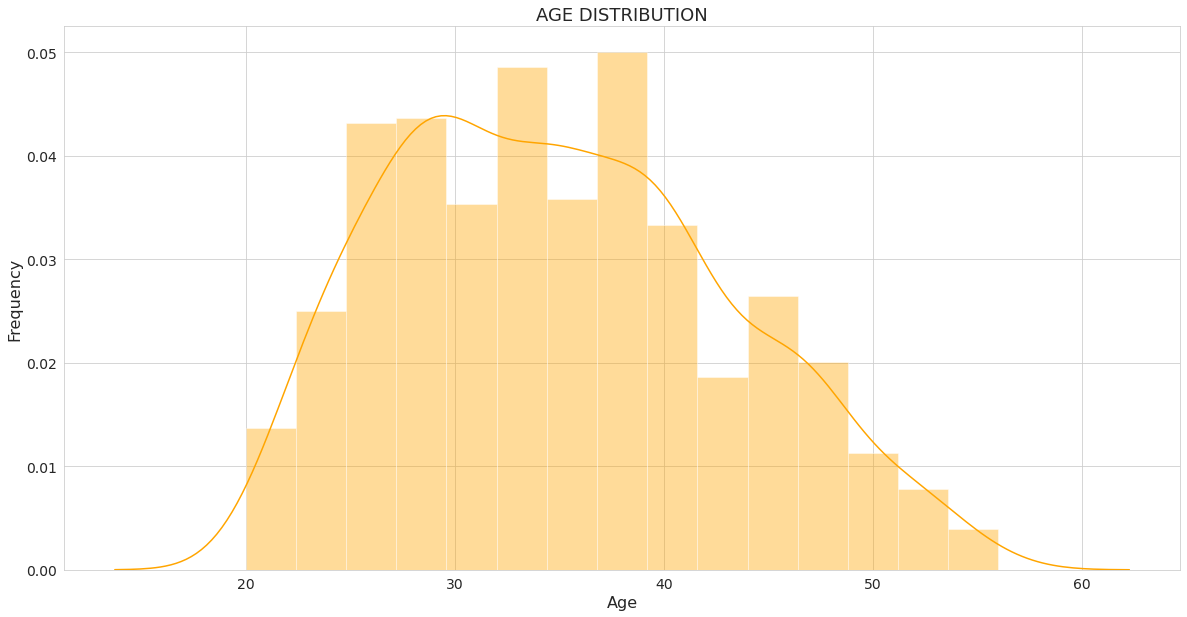

In [ ]:
# Age distribution
print(cl(df['Age'].describe(), attrs = ['bold']))
sb.distplot(df['Age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Edu'}>,
        <Axes: title={'center': 'Years Employed'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Card Debt'}>,
        <Axes: title={'center': 'Other Debt'}>],
       [<Axes: title={'center': 'Defaulted'}>,
        <Axes: title={'center': 'DebtIncomeRatio'}>, <Axes: >]],
      dtype=object)

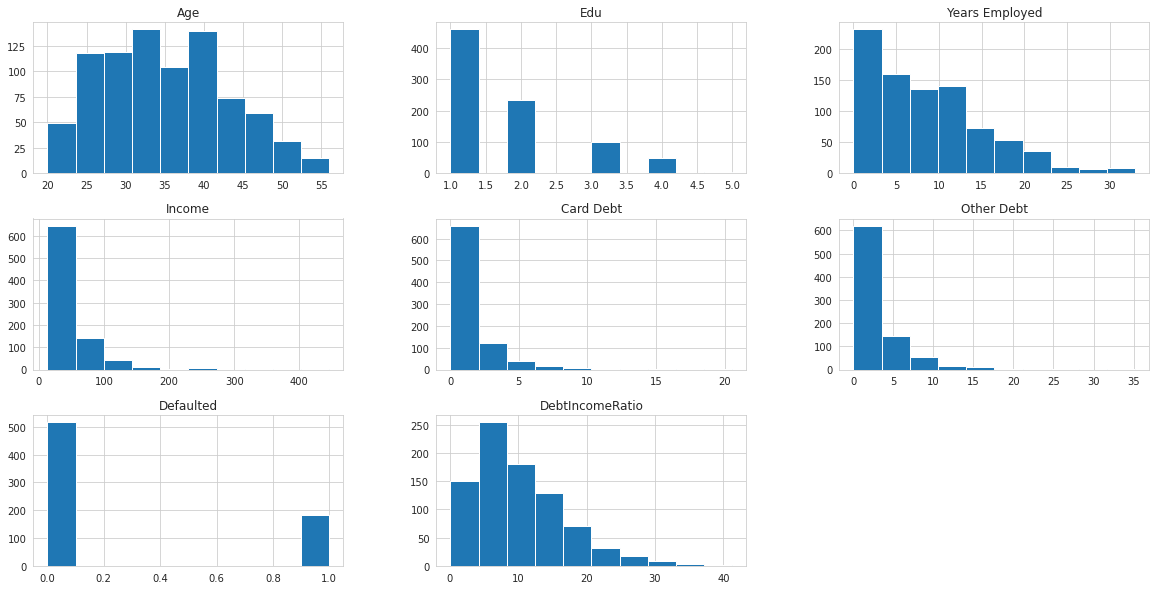

In [12]:
df.hist()

By seeing the graph we can understand that the age with the highest number of customers is around 35–40 and the lowest customer count is between 50–60.

.......................................
Number of Default cases are 183
.......................................
Number of Non-Default cases are 517
.......................................
Percentage of Default cases is 35%
.......................................


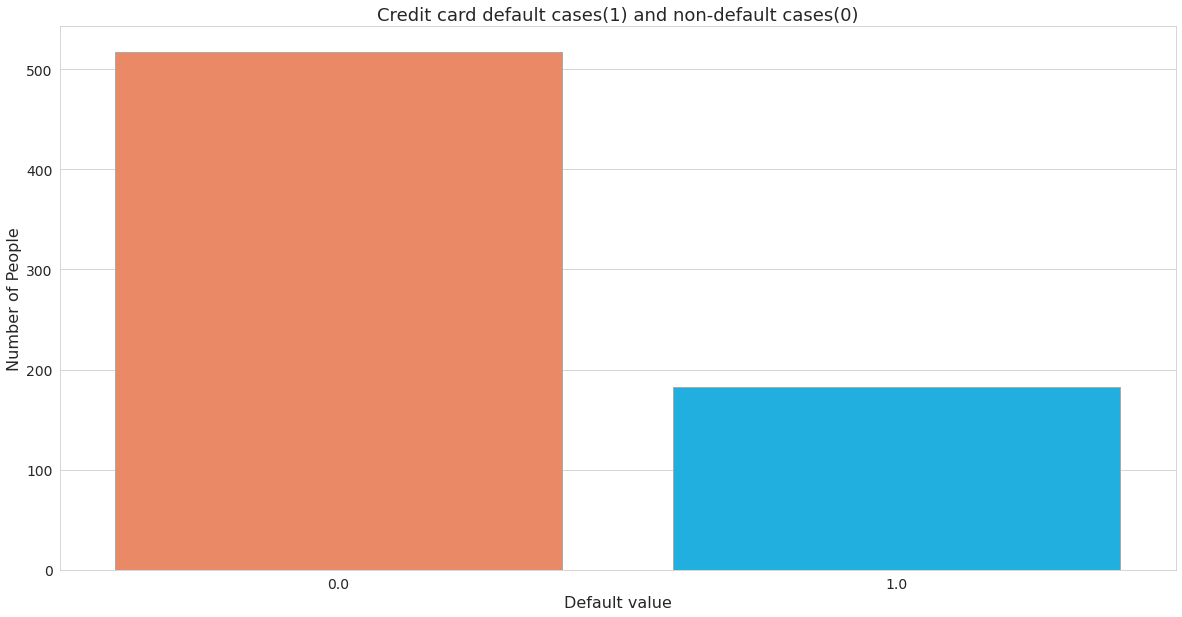

In [ ]:
# Credit card default cases

default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Default cases are {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Non-Default cases are {}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))

sb.countplot(x= df['Defaulted'], palette = ['coral', 'deepskyblue'], edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', 
          fontsize = 18)
plt.xlabel('Default value', 
           fontsize = 16)
plt.ylabel('Number of People', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()

In [15]:
from pandas._libs.missing import NA
df['Defaulted'].fillna(-1, inplace=True) #el inplace es para que aplique el cambio al df
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [16]:
df.groupby('Defaulted').get_group(1).describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0,183.000000
mean,33.010929,1.901639,5.224044,41.213115,2.423858,3.862814,1.0,14.727869
std,8.517589,0.972788,5.542946,43.115529,3.232490,4.263693,0.0,7.902798
min,20.000000,1.000000,0.000000,14.000000,0.073000,0.161000,1.0,0.900000
25%,27.000000,1.000000,1.000000,21.000000,0.543500,1.318000,1.0,8.550000
50%,31.000000,2.000000,3.000000,29.000000,1.377000,2.530000,1.0,13.800000
75%,39.000000,2.000000,8.000000,45.500000,2.711000,4.651000,1.0,19.350000
max,55.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.0,41.300000


array([[<Axes: title={'center': 'Defaulted'}>]], dtype=object)

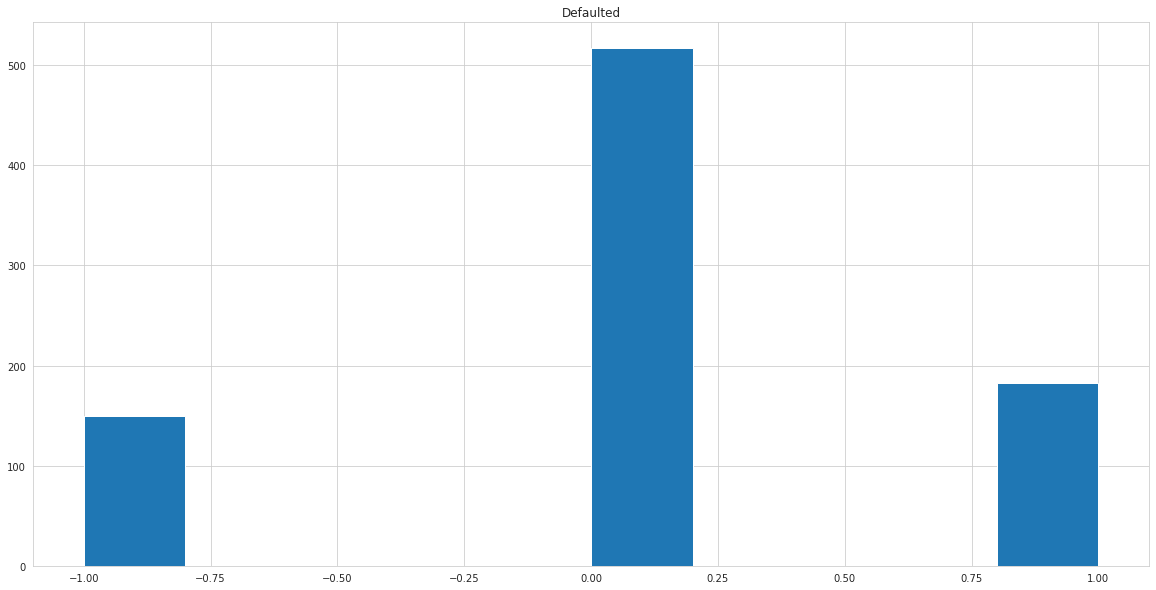

In [18]:
df.hist('Defaulted')

It is understood that most of the customers have not defaulted on their credit cards. To be more precise, the number of customers who have defaulted is 183 and the number of non-default customers is 517 which means 35% of the customers have defaulted on their credit card.

**Now using a scatter plot**, let’s examine the relationship between the ‘Age’ and ‘Income’ attributes. 

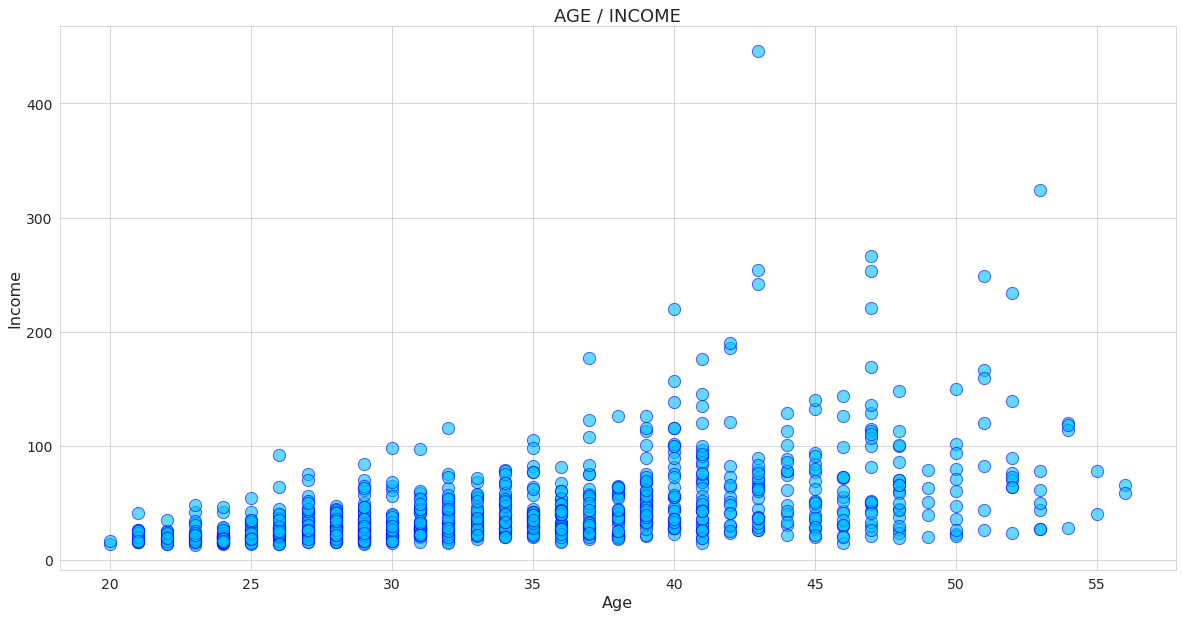

In [ ]:
# Age vs Income
sb.scatterplot(x='Age', y='Income', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('AGE / INCOME', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_income.png')
plt.show()

As we can see, when the age increases, the income also increases. So we can say that the attributes ‘Age’ and ‘Income’ are having a linear relationship.

**bubble plot** that represents the data points of the ‘Income’, ‘Years Employed’, and ‘DebtIncomeRatio’ attributes. The only difference between the scatter plot and bubble plot is that the bubble plot represents the data points of three attributes whereas, in the scatter plot only two are visualized.

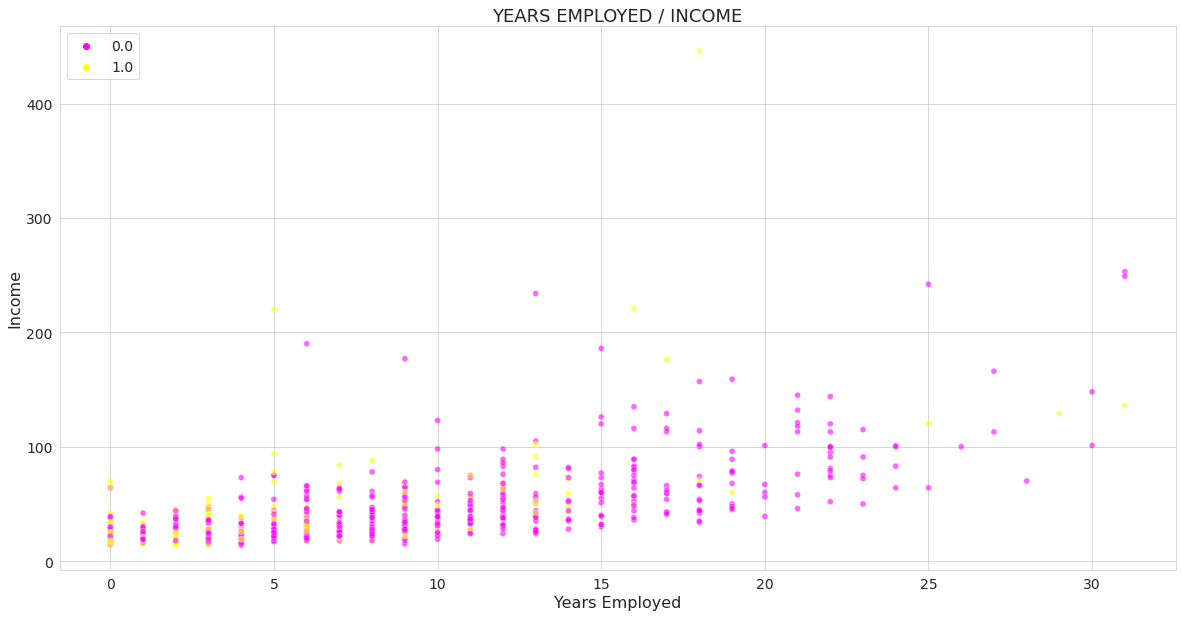

In [ ]:
# Years Employed vs Income
area = df.DebtIncomeRatio**2

sb.scatterplot(x='Years Employed', y='Income', 
               data = df,  
               alpha = 0.6, 
               edgecolor = 'white', 
               hue = 'Defaulted', 
               palette = 'spring')
plt.title('YEARS EMPLOYED / INCOME', 
          fontsize = 18)
plt.xlabel('Years Employed', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('y_income.png')
plt.show()

##4. Processing the data to our needs

In this step, we are going to normalize the dataset and it is very important to build our model. But what is normalization?

**Normalization** is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally

Using the ‘StandardScaler’ function provided by the scikit-learn package, we can feasibly perform normalization over the dataset in python.

In [23]:
# DATA PROCESSING
X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])

Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.06214689 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.06214689  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.5386064   1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.06214689 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.06214689 -0.44250653]]


Now we have all the required components to build the K-Means model. So, we can proceed to build the model.

##5.Building the model using the K-Means algorithm

The KMeans class has many parameters that can be used, but we will be using these three:

* **init** - Initialization method of the centroids. The value will be: ‘k-means++’. k-means++ - Selects initial cluster centers for the k-means clustering in a smart way to speed up convergence.
* **n_clusters** - The number of clusters to form as well as the number of centroids to generate. The value will be 3
* **n_init** - Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. The value will be 12

In [24]:
# MODELING
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]


Now we have successfully built and fitted our K-Means model and stores the cluster labels into the ‘labels’ variable. Using the labels produced by the model we can find some useful insights about the model and come to a conclusion.


##6. Analyzing and visualizing the built K-Means model

To begin finding some useful insights, we have to add an attribute to the customer data that shows the cluster value for each row. 

In [25]:
df['cluster_num'] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,2
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,1


As you can see, we have created a new attribute called ‘cluster_num’ in the customer data that represents which cluster value does each of the rows belong to.

Now let’s use the ‘groupby’ method to group the cluster value and see the mean value of each of the attributes in the dataset using the ‘mean’ method.

In [26]:
df.groupby('cluster_num').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_num,,,,,,,,
0,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.069337,10.094761
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.000000,7.322222
2,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,-0.065574,10.724590


In [27]:
df.groupby('cluster_num').get_group(2).describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0
mean,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,-0.065574,10.724590,2.0
std,6.711752,0.993524,6.551960,23.266265,3.116450,4.627465,0.579945,7.361811,0.0
min,26.000000,1.000000,0.000000,57.000000,0.022000,0.053000,-1.000000,0.100000,2.0
25%,37.000000,1.000000,11.000000,65.000000,1.025000,2.673000,0.000000,5.400000,2.0
50%,41.000000,2.000000,15.000000,76.000000,2.223000,4.695000,0.000000,9.200000,2.0
75%,46.000000,3.000000,20.000000,98.500000,4.033000,7.823000,0.000000,14.350000,2.0
max,56.000000,5.000000,33.000000,150.000000,20.561000,35.197000,1.000000,41.300000,2.0


Let’s look at the distribution of customers based on their age and income using a bubble plot and the color represents the cluster value. 

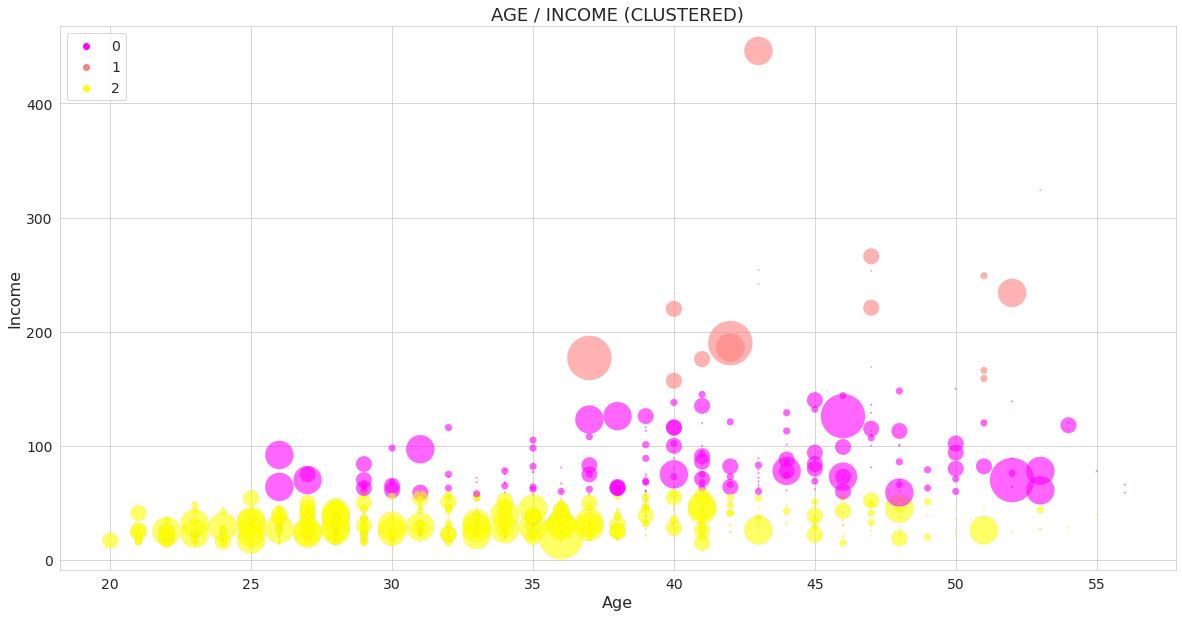

In [ ]:
area = np.pi * (df.Edu) ** 4

sb.scatterplot(x='Age', y='Income', 
               data = df, 
               s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / INCOME (CLUSTERED)', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('c_age_income.png')
plt.show()

In [30]:
kmeans_kwargs={
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":2023
}
sse=[]
for k in range (1,20):
  kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(cluster_data)
  sse.append(kmeans.inertia_)

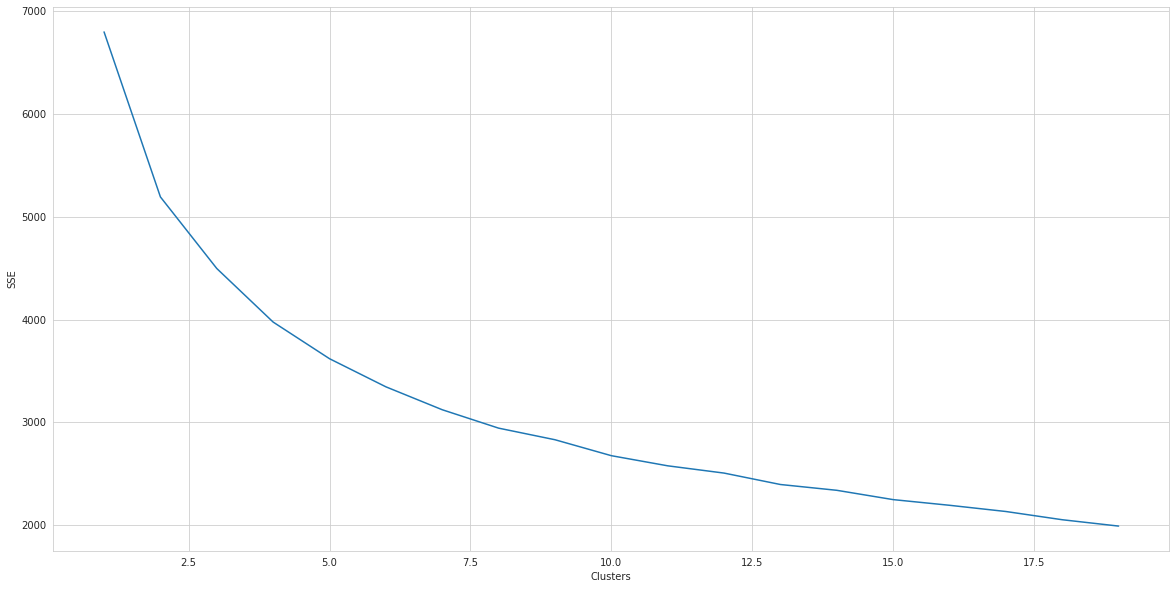

In [31]:
plt.plot(range(1,20),sse)
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.show()

In [32]:
! pip install kneed


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from kneed import KneeLocator

In [34]:
kl=KneeLocator(range(1,20),sse, curve="convex", direction="decreasing")
kl.elbow

6

Our K-Means model has partitioned the customers into mutually exclusive groups, which are three clusters in our case. The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the 3 clusters can be:

* Affluent, Educated & Old Aged
* Middle-Aged & Middle Income
* Young & Low Income
